In [1]:
!python3 setup.py install --user

running install
running bdist_egg
running egg_info
writing bregclus.egg-info\PKG-INFO
writing dependency_links to bregclus.egg-info\dependency_links.txt
writing top-level names to bregclus.egg-info\top_level.txt
reading manifest file 'bregclus.egg-info\SOURCES.txt'
adding license file 'LICENSE'

zip_safe flag not set; analyzing archive contents...



writing manifest file 'bregclus.egg-info\SOURCES.txt'
installing library code to build\bdist.win-amd64\egg
running install_lib
running build_py
creating build\bdist.win-amd64\egg
creating build\bdist.win-amd64\egg\bregclus
copying build\lib\bregclus\divergences.py -> build\bdist.win-amd64\egg\bregclus
copying build\lib\bregclus\models.py -> build\bdist.win-amd64\egg\bregclus
copying build\lib\bregclus\__init__.py -> build\bdist.win-amd64\egg\bregclus
byte-compiling build\bdist.win-amd64\egg\bregclus\divergences.py to divergences.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\bregclus\models.py to models.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\bregclus\__init__.py to __init__.cpython-39.pyc
creating build\bdist.win-amd64\egg\EGG-INFO
copying bregclus.egg-info\PKG-INFO -> build\bdist.win-amd64\egg\EGG-INFO
copying bregclus.egg-info\SOURCES.txt -> build\bdist.win-amd64\egg\EGG-INFO
copying bregclus.egg-info\dependency_links.txt -> build\bdist.win-amd64\egg\EGG-IN

In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
directory = "./Logs/"
save_path = "./Saved/"

In [29]:
from load_logs import *
from evaluation import *
from features import *
from visualize import *

In [30]:
logs, log_labels = read_logs_and_labels("./Saved/logs.txt", "./Saved/labels.txt")

In [31]:
from bregclus.models import BregmanHard
from bregclus.divergences import euclidean
import numpy as np

In [32]:
X = get_features(logs, 2, 70)

labels_ = log_labels
bhc = BregmanHard(n_clusters=10, divergence=euclidean)
X= get_features(logs, 2, 70)
X=X.toarray()
idxs = np.where(np.all(X == 0, axis=1))
X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)
bhc.fit(X)

BregmanHard(n_clusters=10)

In [33]:
y_pred = bhc.predict(X)

In [34]:
labels_ = log_labels
            
X = get_features(logs, 2, 70)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [35]:
bhc.fit(X)

C:\Users\Riley\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Riley\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


BregmanHard(n_clusters=10)

In [36]:
y_pred = bhc.predict(X)

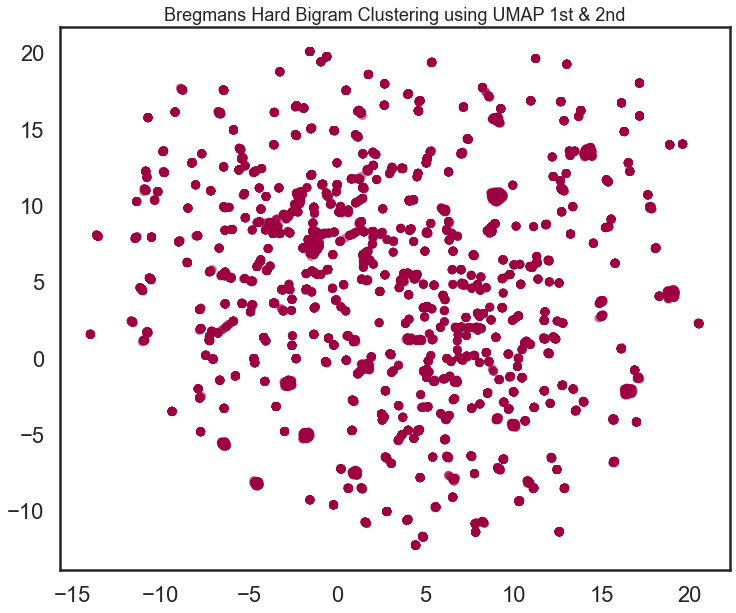

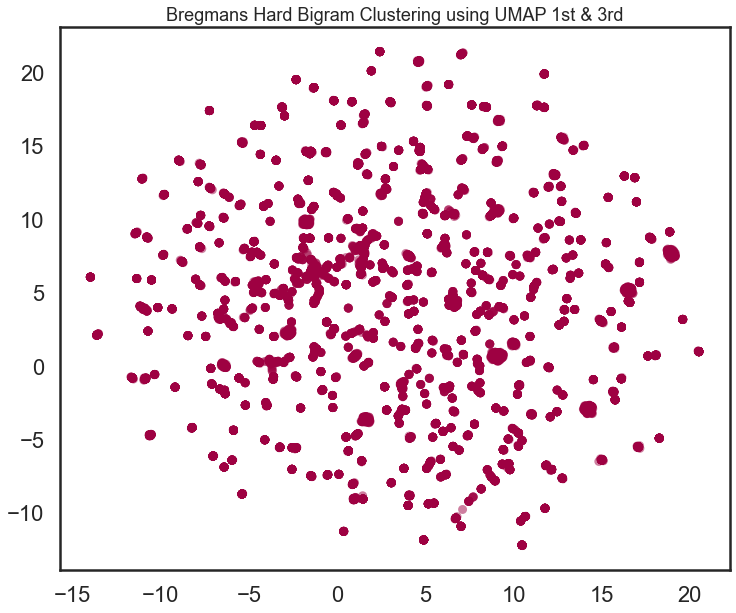

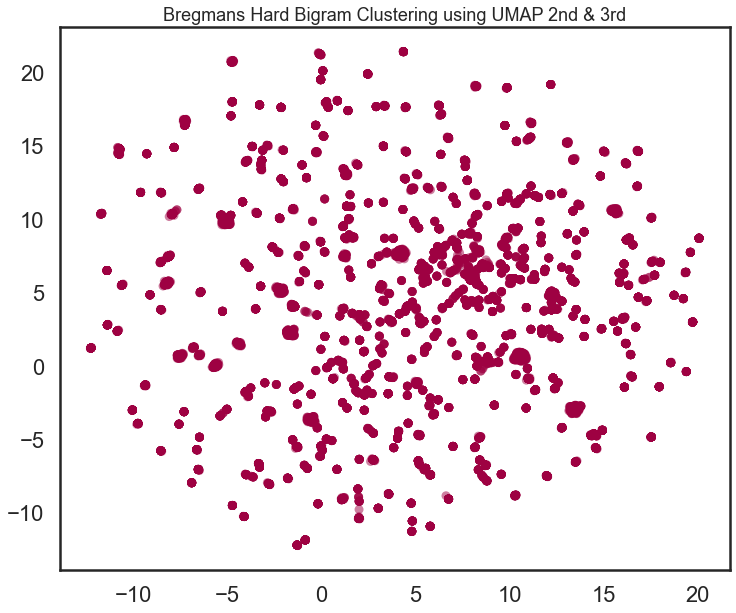

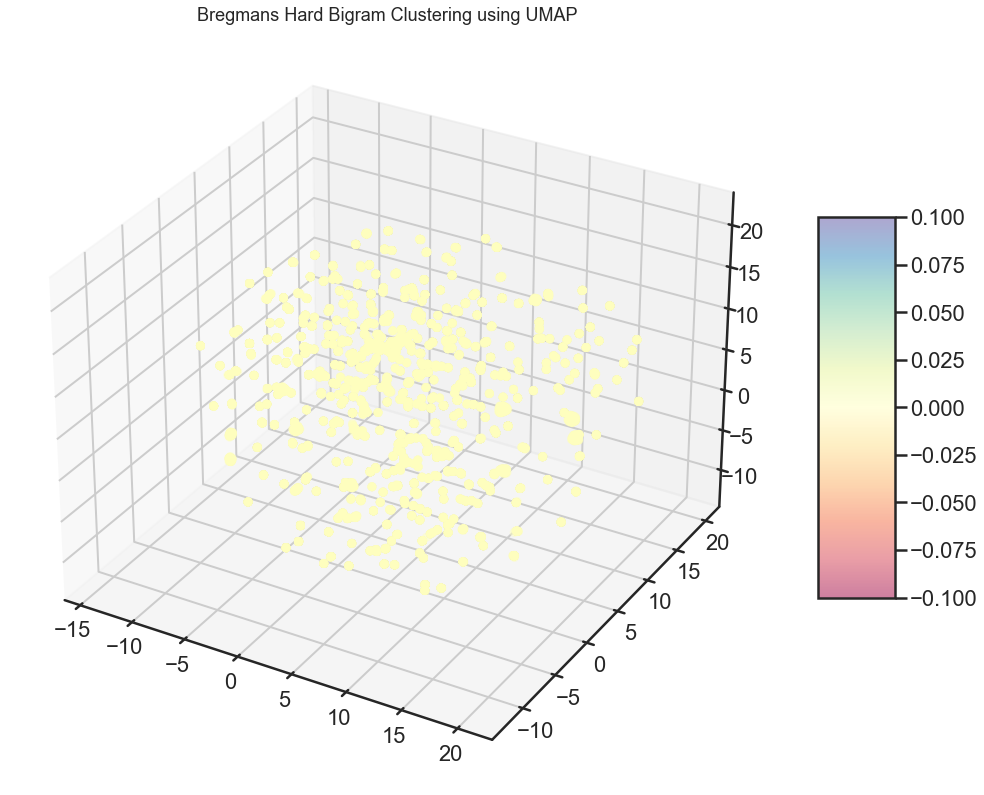

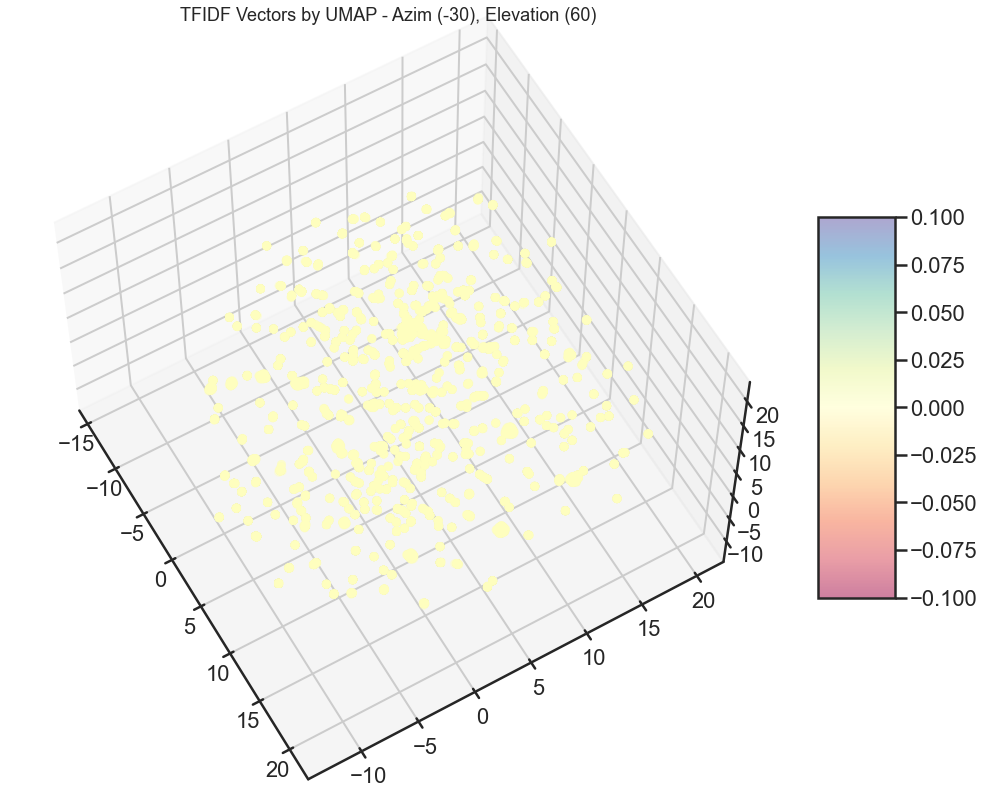

In [37]:
plot_clusters("Bregmans Hard Bigram Clustering using UMAP", X, y_pred)

In [38]:
results = evaluate_clustering('Bregmans Hard Bigram Clustering', X, labels_, y_pred)
print(results)

['Bregmans Hard Bigram Clustering', '0.00', '1.00', '0.00', '0.00', '0.00', '0.58']


In [14]:
labels_ = log_labels
            
X = get_features(logs, 3, 90)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [15]:
bhc.fit(X)

BregmanHard(n_clusters=10)

In [16]:
y_pred = bhc.predict(X)

C:\Users\Riley\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\umap\spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


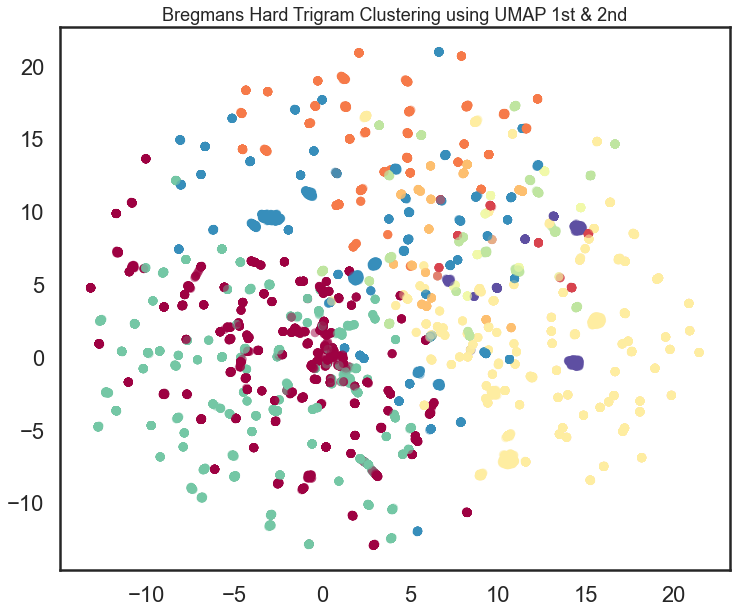

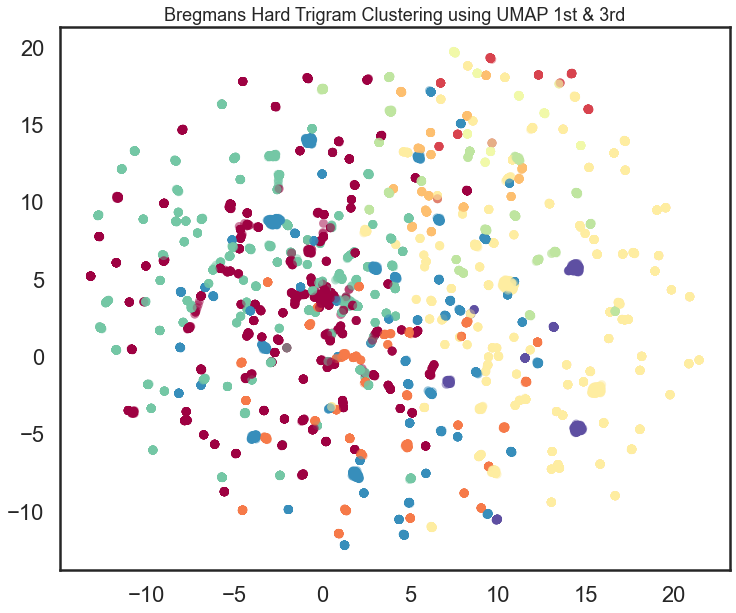

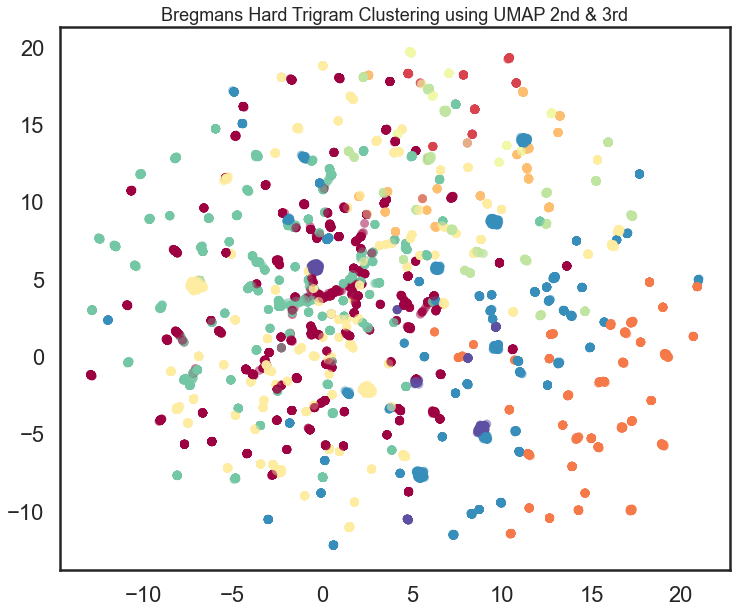

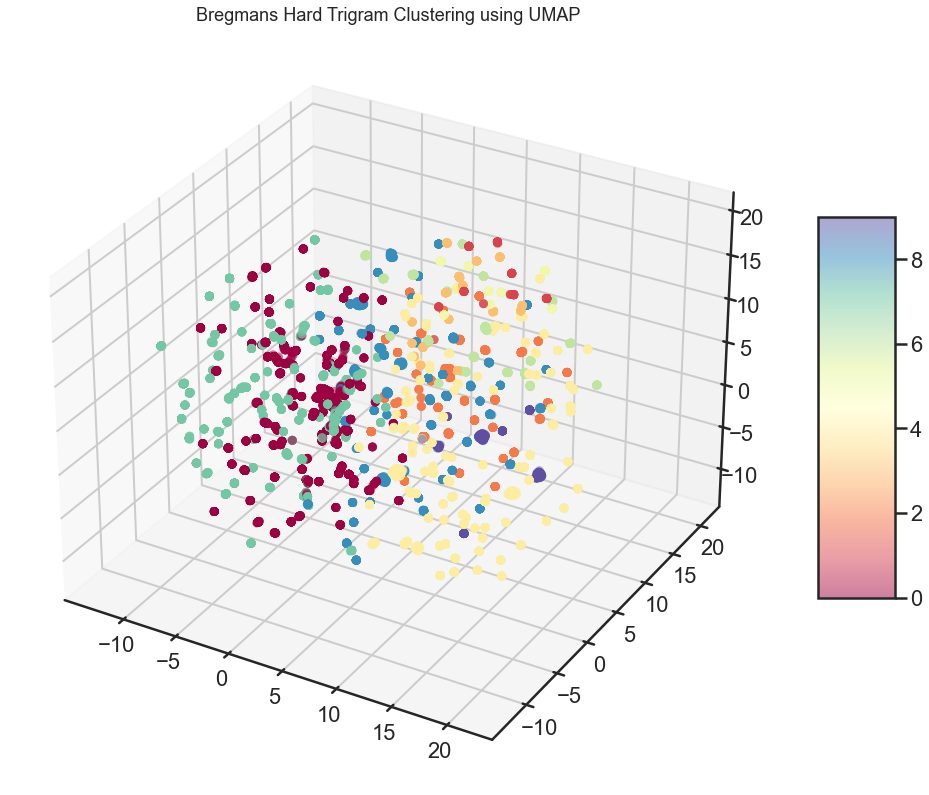

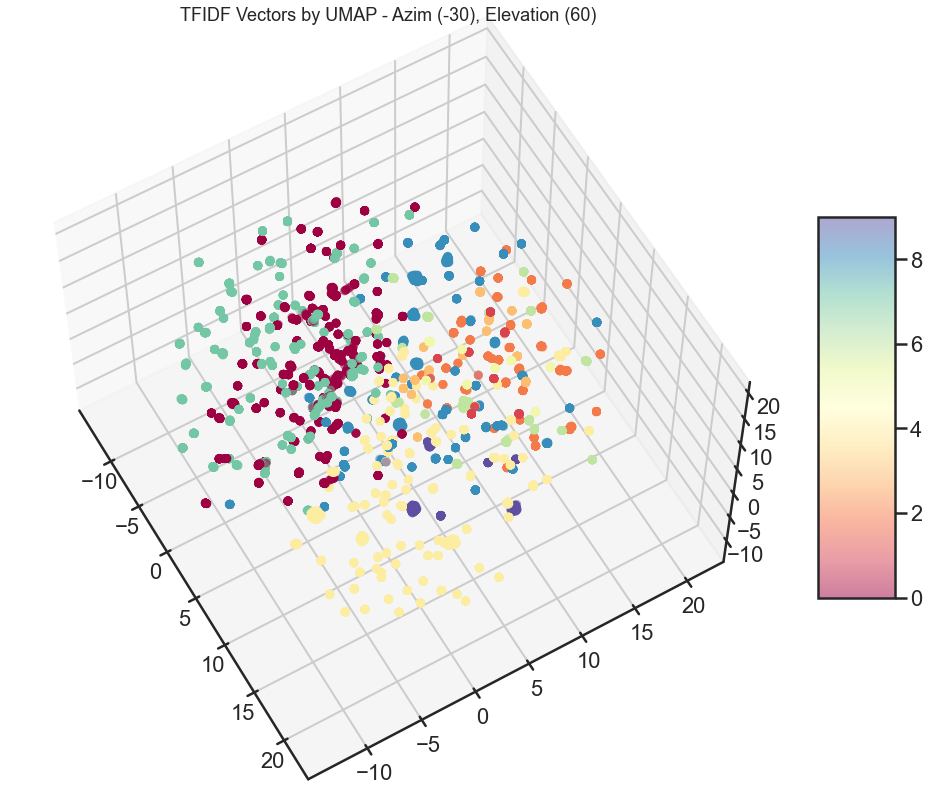

In [17]:
plot_clusters("Bregmans Hard Trigram Clustering using UMAP", X, y_pred)

In [18]:
results = evaluate_clustering('Bregmans Hard Trigram Clustering', X, labels_, y_pred)
print(results)

['Bregmans Hard Trigram Clustering', '0.61', '0.34', '0.44', '0.26', '0.44', '0.45']
